<a href="https://colab.research.google.com/github/Shahupatil2407/Machine-Learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop("sales", axis=1)

In [6]:
y = df["sales"]

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [14]:
poly_features = poly_converter.fit_transform(X)

In [15]:
poly_features.shape

(200, 9)

In [18]:
poly_features[0][0:3]

array([230.1,  37.8,  69.2])

In [20]:
X.iloc[0]

,0
TV,230.1
radio,37.8
newspaper,69.2


In [21]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [22]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
Model = LinearRegression()

In [33]:
Model.fit(X_train, y_train)

LinearRegression()

In [34]:
Model.predict(X_test)

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
MAE = mean_absolute_error(y_test, Model.predict(X_test))
MAE

0.4896798044803838

In [40]:
MSE = mean_squared_error(y_test, Model.predict(X_test))
MSE

0.4417505510403753

In [41]:
RMSE = np.sqrt(MSE)
RMSE

np.float64(0.6646431757269274)

In [42]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,11):
  poly_converter = PolynomialFeatures(degree=d, include_bias=False)
  poly_features = poly_converter.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
  Model = LinearRegression()
  Model.fit(X_train, y_train)
  train_rmse_errors.append(np.sqrt(mean_squared_error(y_train, Model.predict(X_train))))
  test_rmse_errors.append(np.sqrt(mean_squared_error(y_test, Model.predict(X_test))))




Text(0, 0.5, 'RMSE')

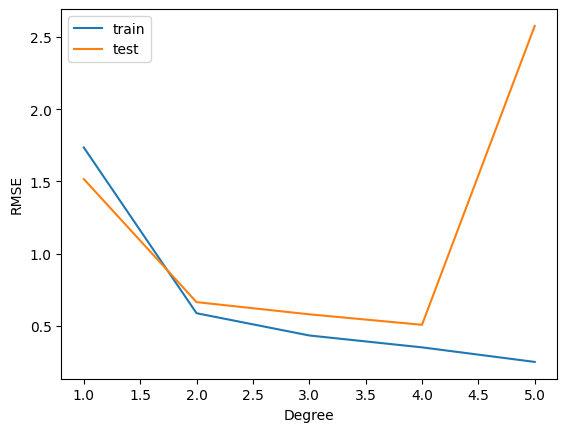

In [47]:
plt.plot(range(1,6), train_rmse_errors[:5], label="train")
plt.plot(range(1,6), test_rmse_errors[:5], label="test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("RMSE")